# Stroke Predictor

In [1]:
# Importing relevant packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Importing our dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Performing Exploratory Data Analysis

In [3]:
data.shape

(5110, 12)

In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### We will remove the null values

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Dropping Id

In [8]:
data.drop(['id'], axis=1, inplace=True)

In [9]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


#### Converting categorical variables into one-hot encoded values 

In [10]:
data.gender = data.gender.map({'Male':0, 'Female':1})
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,0.0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1.0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1.0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,0.0,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [11]:
data.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [12]:
data.ever_married = data.ever_married.map({'Yes':1,'No':0})

In [13]:
data.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [14]:
data.Residence_type = data.Residence_type.map({'Urban':1,'Rural':0})

In [15]:
data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [16]:
data[data.smoking_status=='Unknown'].count()

gender               1483
age                  1483
hypertension         1483
heart_disease        1483
ever_married         1483
work_type            1483
Residence_type       1483
avg_glucose_level    1483
bmi                  1483
smoking_status       1483
stroke               1483
dtype: int64

In [17]:
data.smoking_status = data.smoking_status.map({'formerly smoked':0,
                                               'never smoked':1,
                                               'smokes':2,
                                               'Unknown':3})

In [18]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,1,Private,1,228.69,36.6,0,1
2,0.0,80.0,0,1,1,Private,0,105.92,32.5,1,1
3,1.0,49.0,0,0,1,Private,1,171.23,34.4,2,1
4,1.0,79.0,1,0,1,Self-employed,0,174.12,24.0,1,1
5,0.0,81.0,0,0,1,Private,1,186.21,29.0,0,1


In [19]:
data.smoking_status.unique()

array([0, 1, 2, 3], dtype=int64)

In [20]:
data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [21]:
data.work_type = data.work_type.map({'Private':0,
                                     'Self-employed':1,
                                     'Govt_job':2,
                                     'children':3,
                                     'Never_worked':4})

In [22]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,1,0,1,228.69,36.6,0,1
2,0.0,80.0,0,1,1,0,0,105.92,32.5,1,1
3,1.0,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1.0,79.0,1,0,1,1,0,174.12,24.0,1,1
5,0.0,81.0,0,0,1,0,1,186.21,29.0,0,1


#### Checking whether our target variable is balanced or not

C:\Users\HP\anaconda3\envs\py3_TensorFLow2.0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

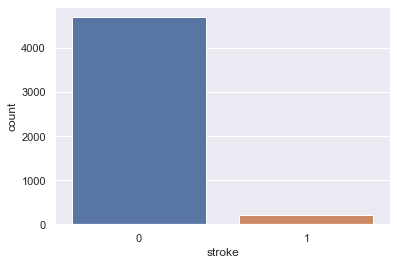

In [23]:
sns.countplot(data.stroke)

#### There is heavy imbalance present in our target variable

In [24]:
data.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

## Balancing the Dataset (Using resample from utils)

In [25]:
df = data.copy()

In [26]:
df = df.dropna()

#### To balance the dataset, we upsample the minority target variable which is stroke=1

In [27]:
df_minority = df[df.stroke==1]
df_majority = df[df.stroke==0]

In [28]:
from sklearn.utils import resample

In [29]:
df_minority_upsample = resample(df_minority, replace=True, n_samples=4699, random_state=0)
df_upsampled = pd.concat([df_majority,df_minority_upsample])
print(df_upsampled.stroke.value_counts())

1    4699
0    4699
Name: stroke, dtype: int64


C:\Users\HP\anaconda3\envs\py3_TensorFLow2.0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

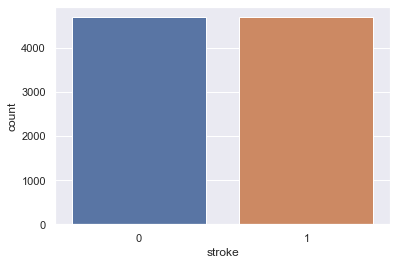

In [30]:
sns.countplot(df_upsampled.stroke)

#### Thus, we have successfully balanced the dataset

In [31]:
df = df_upsampled.copy()

### Visualizing our dataset

In [32]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,0.0,3.0,0,0,0,3,0,95.12,18.0,3,0
250,0.0,58.0,1,0,1,0,1,87.96,39.2,1,0
251,1.0,8.0,0,0,0,0,1,110.89,17.6,3,0
252,1.0,70.0,0,0,1,0,0,69.04,35.9,0,0
253,0.0,14.0,0,0,0,4,0,161.28,19.1,3,0


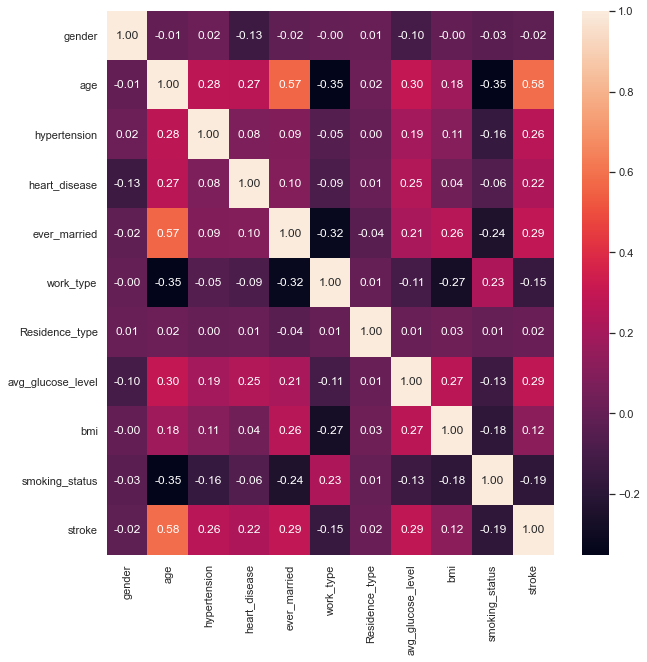

In [33]:
# Taking a look at the correlation
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',ax=ax);

#### As we can see multicollinearity is not present

In [34]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [35]:
df =df.dropna()

In [36]:
df.stroke.value_counts()

1    4699
0    4699
Name: stroke, dtype: int64

### Checking best features using chi2 test

In [37]:
#Finding k-best features using chi2

from sklearn.feature_selection import SelectKBest, chi2
best = SelectKBest(score_func=chi2, k='all')
best.fit(df.drop('stroke',axis=1),df.stroke)

table = pd.DataFrame()
table['Features'] = df.drop('stroke', axis=1).columns.values
table['Score'] = best.scores_
table['p-value'] = best.pvalues_

table.sort_values(by=['Score'], ascending=False)

,Features,Score,p-value
1,age,28769.699489,0.000000e+00
7,avg_glucose_level,20217.338216,0.000000e+00
2,hypertension,530.644495,2.045199e-117
3,heart_disease,418.051068,6.481220e-93
5,work_type,301.858134,1.297032e-67
9,smoking_status,258.941225,2.919480e-58
8,bmi,239.738634,4.484304e-54
4,ever_married,184.627713,4.732296e-42
0,gender,1.583776,2.082176e-01
6,Residence_type,1.421878,2.330945e-01


#### As we can see, Age along with Average Glucose Value and Hypertension are some of the most important features when predicting a stroke.

C:\Users\HP\anaconda3\envs\py3_TensorFLow2.0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


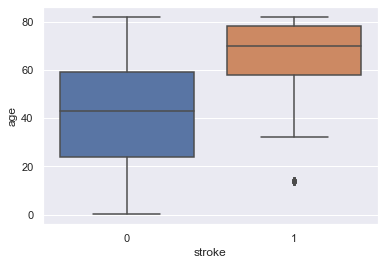

In [38]:
sns.boxplot(df.stroke, df.age);

C:\Users\HP\anaconda3\envs\py3_TensorFLow2.0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


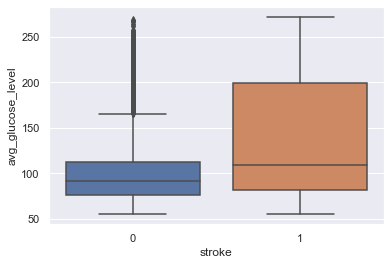

In [39]:
sns.boxplot(df.stroke, df.avg_glucose_level);

#### We can clearly see that people above age 60 and people with a higher average glucose level are more vulnerable to strokes

In [40]:
#ax = sns.swarmplot(df.stroke, df.age);

### -------------------------------------------------------------------------------------------------------------------------------

## Balancing Dataset

In [41]:
d = data.copy()

In [42]:
d.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [43]:
d = d.dropna()

### We split the dataset before balancing to prevent Data Leakage

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = d.drop('stroke', axis=1)
y = d.stroke

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Using SMOTE Algorithm for oversampling minority class and deal with imbalance

In [47]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [48]:
y_train.value_counts()

1    3760
0    3760
Name: stroke, dtype: int64

In [49]:
sm_test = SMOTE(random_state=1)
X_test, y_test = sm_test.fit_sample(X_test, y_test)

In [50]:
y_test.value_counts()

1    939
0    939
Name: stroke, dtype: int64

#### ---(1)

### Using resample method of utils package

In [51]:
X1 = df.drop('stroke', axis=1)
y1 = df.stroke

In [52]:
y1.value_counts()

1    4699
0    4699
Name: stroke, dtype: int64

In [53]:
X_test['gender'].iloc[-7]

0.037862587720430496

#### ---(2)

### -------------------------------------------------------------------------------------------------------------------------------------

In [54]:
#d10 = pd.concat([X_train, y_train], axis=1)

In [55]:
#d10['gender'] = d10['gender'].round()

## Scaling Data

#### Using (1)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [59]:
#X_train = d10.drop('stroke',axis=1)
#y_train = d10.stroke

In [60]:
X_train['gender'] = X_train['gender'].round()
X_test['gender'] = X_test['gender'].round()

In [61]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Using (2)

In [62]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=0)

In [63]:
scaler1 = StandardScaler()

In [64]:
scaler1.fit(X1_train)
X1_train_scaled = scaler1.transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

### ---------------------------------------------------------------------------------------------------------------------------------------------------

## Creating our model (Base Models)

## 1) Logistic Regression

#### Using (1)

In [65]:
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix, plot_confusion_matrix

Training:
F1-Score:  0.8117045007216901
ROC_AUC:  0.8091755319148937
Confusion Matrix:
[[2992  768]
 [ 667 3093]]


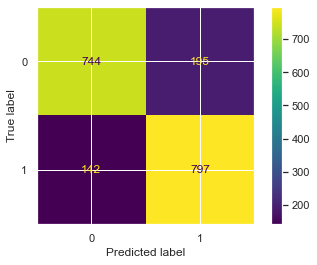

In [66]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train_scaled, y_train)
pred = reg.predict(X_train_scaled)
print('Training:')
print('F1-Score: ', f1_score(y_train,reg.predict(X_train_scaled)))
print('ROC_AUC: ', roc_auc_score(y_train,reg.predict(X_train_scaled)))
print('Confusion Matrix:')
print(confusion_matrix(y_train,reg.predict(X_train_scaled)))
plot_confusion_matrix(reg,X_test_scaled, y_test)
plt.show()

#### Using (2)

In [67]:
reg1 = LogisticRegression()
reg1.fit(X1_train_scaled,y1_train)
print('Training Accuracy: ', reg1.score(X1_train_scaled,y1_train))

Training Accuracy:  0.7686884809789838


#### As we can clearly see, using SMOTE algorithm for upsampling works better than resample. Henceforth, we will use the former variables (X&y) for other ML Algorithms

### 2) Support Vector Machine

Training:
F1-Score:  0.8126793634229064
ROC_AUC:  0.8090425531914894
Confusion Matrix:
[[2969  791]
 [ 645 3115]]


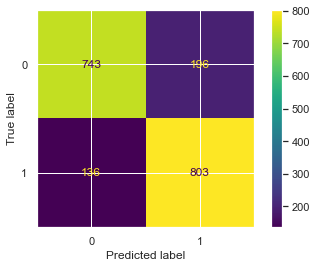

In [68]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)
print('Training:')
print('F1-Score: ', f1_score(y_train,svc.predict(X_train_scaled)))
print('ROC_AUC: ', roc_auc_score(y_train,svc.predict(X_train_scaled)))
print('Confusion Matrix:')
print(confusion_matrix(y_train,svc.predict(X_train_scaled)))
plot_confusion_matrix(svc,X_test_scaled, y_test)
plt.show()

### 3) Random Forest Classifier

C:\Users\HP\anaconda3\envs\py3_TensorFLow2.0\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Training Accuracy:  0.9757683215130024
Validation Accuracy:  0.8856382978723404
------------------------------------------------
Training Accuracy:  0.9775413711583925
Validation Accuracy:  0.8803191489361702
------------------------------------------------
Training Accuracy:  0.9778368794326241
Validation Accuracy:  0.898936170212766
------------------------------------------------
Training Accuracy:  0.9775413711583925
Validation Accuracy:  0.8776595744680851
------------------------------------------------
Training Accuracy:  0.9773936170212766
Validation Accuracy:  0.8763297872340425
------------------------------------------------
Training Accuracy:  0.97798463356974
Validation Accuracy:  0.9587765957446809
------------------------------------------------
Training Accuracy:  0.9775413711583925
Validation Accuracy:  0.9694148936170213
------------------------------------------------
Training Accuracy:  0.9778368794326241
Validation Accuracy:  0.9654255319148937
--------------------

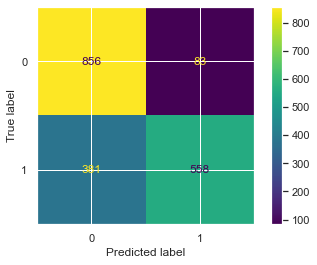

In [69]:
# Using K-Fold Validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=0)

for train_index,test_index in kf.split(X_train_scaled,y_train):
    X_kf_train, X_kf_test = X_train_scaled[train_index], X_train_scaled[test_index]
    y_kf_train, y_kf_test = y_train.iloc[train_index], y_train.iloc[test_index]
    rfc = RandomForestClassifier(n_estimators=500,min_samples_leaf=3).fit(X_kf_train,y_kf_train)
    print('Training Accuracy: ', rfc.score(X_kf_train, y_kf_train))
    print('Validation Accuracy: ', rfc.score(X_kf_test, y_kf_test))
    print('------------------------------------------------')
    
plot_confusion_matrix(rfc,X_test_scaled, y_test)
plt.show()

In [70]:
np.unique(rfc.predict(X_train_scaled))

array([0, 1], dtype=int64)

In [71]:
print('Accuracy on Testing Dataset: ', rfc.score(X_test_scaled, y_test))

Accuracy on Testing Dataset:  0.7529286474973376


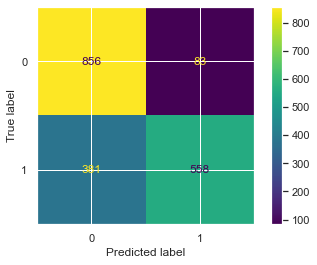

In [72]:
plot_confusion_matrix(rfc,X_test_scaled, y_test)
plt.show()

#### Converting it into a pickle file for production

In [73]:
'''
import pickle
with open('old_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)
'''

"\nimport pickle\nwith open('old_model.pkl', 'wb') as file:\n    pickle.dump(rfc, file)\n"

### 4) K Nearest Neighbors

In [74]:
from sklearn.neighbors import KNeighborsClassifier

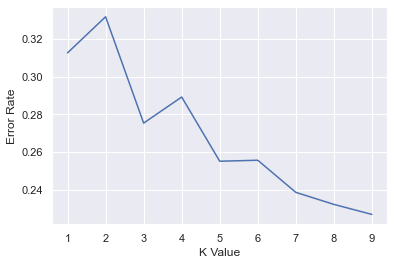

In [75]:
k= range(1,10)
error_rate=[]

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred != y_test))

#Plotting graph between K value and error rate
plt.plot(k, error_rate)
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()



#### We check error rate on testing dataset for finding optimal value for K. Here, K=2 gives the lowest error.

Testing: 
F1-Score:  0.5676613462873005
ROC_AUC:  0.6682641107561235
0.6682641107561236
Confusion Matrix: 
[[846  93]
 [530 409]]


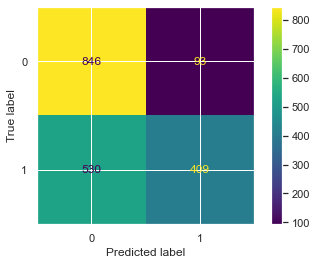

In [76]:
knn_final = KNeighborsClassifier(n_neighbors=2)
knn_final.fit(X_train_scaled,y_train)
predict = knn_final.predict(X_test_scaled)
print('Testing: ')
print('F1-Score: ', f1_score(y_test,predict))
print('ROC_AUC: ', roc_auc_score(y_test,predict))
print(knn_final.score(X_test_scaled, y_test))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,predict))
plot_confusion_matrix(knn_final,X_test_scaled, y_test)
plt.show()

### 5) Artificial Neural Network

In [77]:
#import tensorflow as tf

In [78]:
'''ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8,activation='tanh'))  #First Hidden Layer
ann.add(tf.keras.layers.Dense(units=8,activation='tanh'))  #Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=8,activation='tanh'))  #Third Hidden Layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) #Output Layer'''

"ann = tf.keras.models.Sequential()\nann.add(tf.keras.layers.Dense(units=8,activation='tanh'))  #First Hidden Layer\nann.add(tf.keras.layers.Dense(units=8,activation='tanh'))  #Second Hidden Layer\nann.add(tf.keras.layers.Dense(units=8,activation='tanh'))  #Third Hidden Layer\nann.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) #Output Layer"

In [79]:
#ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
#ann.fit(X_train_scaled, y_train.to_numpy(), batch_size=30, epochs=100, validation_split=0.2)

### 6) XGBoost

In [81]:
from xgboost import XGBClassifier

In [82]:
xgb = XGBClassifier().fit(X_train_scaled, y_train)
print('Accuracy: ',xgb.score(X_train_scaled, y_train))

Accuracy:  0.8819148936170212


Accuracy on testing:  0.825346112886049


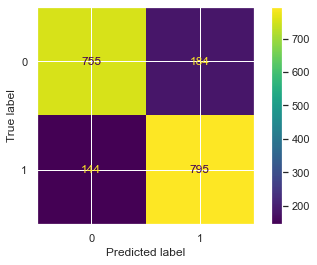

In [83]:
# Testing it 
print('Accuracy on testing: ', xgb.score(X_test_scaled, y_test))
plot_confusion_matrix(xgb,X_test_scaled, y_test)
plt.show()

### -----------------------------------------------------------------------------------------------------------------------------------------------

### Creating Optimized Model (Hyperparameter Tuning)

#### We need to do some hyperparameter tuning. For that we will be using RandomizedSearchCV

### 1) Random Forest

In [84]:
rfc_model = RandomForestClassifier()

In [85]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators':[10,100,500,900,1100],
    'max_depth':[1,3,4,5,10,15],
    'min_samples_leaf':[1,2,3,5]
}

In [86]:
'''random_CV = RandomizedSearchCV(
    estimator = rfc_model,
    param_distributions = params,
    n_iter = 50,
    verbose = 5,
    n_jobs = 4,
    cv = 4,
    random_state = 0
)
'''

'random_CV = RandomizedSearchCV(\n    estimator = rfc_model,\n    param_distributions = params,\n    n_iter = 50,\n    verbose = 5,\n    n_jobs = 4,\n    cv = 4,\n    random_state = 0\n)\n'

In [87]:
#random_CV.fit(X_train_scaled, y_train)

In [88]:
#random_CV.best_estimator_

In [89]:
#rfc_model = RandomForestClassifier(max_depth=15, n_estimators=1100)

In [90]:
#rfc_model.fit(X_train_scaled, y_train)

In [91]:
#print('Training Accuracy: ', rfc_model.score(X_train_scaled, y_train))

In [92]:
#print('Testing Accuracy: ', rfc_model.score(X_test_scaled, y_test))

### 2) Using RandomizedSearchCV on XGBoost

In [93]:
xgb_model = XGBClassifier()

In [94]:
random_CV_xgb = RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions = params,
    n_iter = 50,
    verbose = 5,
    n_jobs = 4,
    cv = 4,
    random_state = 0
)

In [95]:
random_CV_xgb.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   18.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  3.9min finished


RandomizedSearchCV(cv=4, estimator=XGBClassifier(), n_iter=50, n_jobs=4,
                   param_distributions={'max_depth': [1, 3, 4, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'n_estimators': [10, 100, 500, 900,
                                                         1100]},
                   random_state=0, verbose=5)

In [96]:
random_CV_xgb.best_estimator_

XGBClassifier(max_depth=10, min_samples_leaf=3, n_estimators=900)

In [97]:
xgb_model = XGBClassifier(max_depth=5, min_samples_leaf=3, n_estimators=1100, max_delta_step = 1)

In [98]:
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(max_delta_step=1, max_depth=5, min_samples_leaf=3,
              n_estimators=1100)

In [99]:
print('Training Accuracy: ', xgb_model.score(X_train_scaled, y_train))

Training Accuracy:  1.0


In [100]:
print('Testing Accuracy: ', xgb_model.score(X_test_scaled, y_test))

Testing Accuracy:  0.8610223642172524


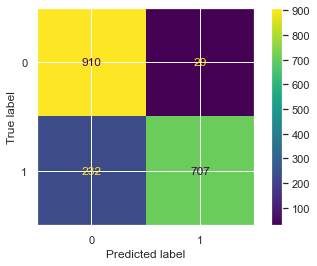

In [101]:
plot_confusion_matrix(xgb_model,X_test_scaled, y_test)
plt.show()

In [102]:
np.unique(xgb_model.predict(X_test_scaled))

array([0, 1], dtype=int64)

## Hence, using hyperparameter tuning, we are able to increase accuracy to 93.68%. We will now deploy this model first converting it into a pickle file.

In [129]:
import pickle
with open('stroke_changed.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [104]:
#with open('scaler.pkl', 'wb') as file:
#    pickle.dump(scaler, file)

In [105]:
final_data = pd.concat([X_train, y_train], axis=1)
final_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,56.0,0,0,1,1,0,125.87,24.6,1,0
1,1.0,24.0,0,0,0,2,1,104.86,19.8,1,0
2,0.0,30.0,0,0,1,0,0,58.89,26.1,0,0
3,1.0,32.0,0,0,0,0,1,68.19,21.1,1,0
4,1.0,62.0,0,0,1,0,0,203.57,29.1,3,0


In [106]:
#final_data.to_csv('final_data.csv')

In [107]:
final_data[final_data.stroke==1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
25,1.0,49.000000,0,0,1,0,1,60.910000,29.900000,1,1
37,1.0,50.000000,1,0,1,0,0,73.180000,30.300000,0,1
78,0.0,69.000000,0,1,1,1,1,195.230000,28.300000,2,1
79,0.0,80.000000,0,1,1,0,0,105.920000,32.500000,1,1
127,1.0,81.000000,0,0,0,2,1,70.300000,25.800000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
7515,1.0,47.605988,0,0,1,0,0,60.516889,31.196431,1,1
7516,0.0,68.906445,0,0,1,1,0,196.246008,28.150312,1,1
7517,1.0,53.844699,0,0,1,0,0,60.344785,28.877230,0,1
7518,1.0,73.380961,0,0,1,1,0,195.071902,30.719035,0,1


In [108]:
ds = pd.concat([X_test, y_test], axis=1)
ds.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,49.0,0,0,1,1,1,70.73,27.3,0,0
1,0.0,40.0,0,0,1,0,0,144.48,29.8,2,0
2,1.0,74.0,0,0,1,2,1,251.99,25.5,1,0
3,1.0,57.0,0,0,1,0,0,77.93,21.7,1,0
4,1.0,51.0,1,0,1,2,1,69.94,33.3,2,0


In [109]:
ds[ds.stroke==1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
10,1.0,80.000000,1,0,1,0,0,74.900000,22.200000,1,1
14,0.0,68.000000,1,1,1,0,0,271.740000,31.100000,2,1
40,1.0,79.000000,0,1,1,0,0,127.290000,27.700000,1,1
43,0.0,59.000000,0,0,1,0,1,111.040000,32.000000,0,1
50,1.0,77.000000,0,1,1,0,0,231.560000,36.900000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1873,0.0,53.913039,0,0,1,1,0,87.823274,31.072173,1,1
1874,0.0,59.752174,1,0,1,0,0,256.323438,34.330399,1,1
1875,0.0,66.055698,0,0,1,0,0,152.717328,27.533419,0,1
1876,1.0,73.526350,0,0,1,0,0,59.341184,32.564476,0,1


In [110]:
summary = pd.DataFrame()
summary['Actual Values'] = y_test
summary['Predicted Values'] = xgb_model.predict(X_test_scaled)
summary.head(10)

,Actual Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [111]:
len(summary)

1878

In [112]:
summary[summary['Actual Values'] != summary['Predicted Values']].head(10)

,Actual Values,Predicted Values
14,1,0
24,0,1
40,1,0
43,1,0
44,0,1
50,1,0
51,1,0
58,1,0
71,1,0
76,1,0


In [113]:
len(summary[summary['Actual Values'] != summary['Predicted Values']])

261

### ----------------------------------------------------------------- END -----------------------------------------------------------------------------------

In [114]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,1,0,1,228.69,36.6,0,1
2,0.0,80.0,0,1,1,0,0,105.92,32.5,1,1
3,1.0,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1.0,79.0,1,0,1,1,0,174.12,24.0,1,1
5,0.0,81.0,0,0,1,0,1,186.21,29.0,0,1


In [115]:
data.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [123]:
len(summary[summary['Actual Values'] == summary['Predicted Values']])

1617

In [118]:
len(summary[summary['Predicted Values'] == 1])

736

In [119]:
len(summary[summary['Predicted Values'] == 0])

1142

In [124]:
right_answer = summary[summary['Actual Values'] == summary['Predicted Values']]

In [128]:
len(right_answer[right_answer['Actual Values'] == 1])

707